<h1 align=center> Implementation of ZKP for Merkle tree Using Python</h1>

.

In [146]:
from math import*
from csv import *
from hashlib import * 
import os
import random
import matplotlib.pyplot as plt
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

In [147]:
L=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,"Nguepi","Nguefack","Tondji"]
L1=[1,2,3,4,5,6,7,8]


In [148]:
# This code allow us to integer hash  
def hashThis_int(M):
    r=0
    hash=sha256();
    hash.update(str(r).encode());
    hash.update(M.encode());
    return int(hash.hexdigest(),16);

In [149]:
hashThis_int("Nguefack")

98308941888556364773191993917330179511595787205275262433735289253208501263596L

In [150]:
## Check if the number is the power of two or not.
def Check_power_two(x):
    n=log(x)/log(2)
    if n.is_integer():
        return True
    return False

In [151]:
#This function transform the content of csv file into a list.
def Transform_csv_file_on_list(filePath):
    # Test.csv is in my Bureau location
    filePath = '/home/nguepi/Bureau/Test.csv'
    
    fileOpen = open(filePath, 'rU')
    # opening the file for reading in Universal NewLine (rU) 

    fileReader = reader(fileOpen)
    # initializing the CSV Reader for traversing data inside the csv file

    data_list = []
    for row in fileReader :

        for tnx in row :

            currentItem = str(tnx)
            data_list.append(currentItem)
    return data_list

In [152]:
filePath = '/home/nguepi/Bureau/Test.csv'
Transform_csv_file_on_list(filePath)

['nguepi',
 'nguepi',
 'nguepi',
 'nguepi',
 'nguepi',
 'nguepi',
 'nguepi',
 'nguepi',
 'nguepi',
 'nguepi',
 'nguepi',
 'idriss',
 'idriss',
 'idriss',
 'idriss',
 'idriss',
 'idriss',
 'idriss',
 'idriss',
 'idriss',
 'idriss',
 'idriss',
 'idriss',
 'nguefack',
 'nguefack',
 'nguefack',
 'nguefack',
 'nguefack',
 'nguefack',
 'nguefack',
 'nguefack',
 'nguefack']

In [153]:
## This function allow us to solve padding probleme.
def Check_data_len(L):
    while Check_power_two(len(L))==False:
        L.append(random.randrange(0, 10000, 1))
    return L       

In [154]:
## This function allow us to hash all the elements of the list L 
def Return_Hashlist(L):
    List_result=[]
    for i in range(len(L)):
        List_result.append(sha256(str(L[i])).hexdigest())
    return List_result  

In [155]:
## This function allow us to add an element L in the dictionnary Dict at the position i
def Add_list(L,Dict,i):
    Dict[str(i)]=L
    return Dict

In [156]:
#Give the hash of the concatenation of H1 and H2.
def Add_and_hash(H1,H2):
    return sha256(str(hashThis_int(H1)+hashThis_int(H2))).hexdigest()

In [157]:
# This code allow us to build the Merkle tree
def Merkle_tree(L):
    j=2
    Dict={}
    Check_data_len(L)
    Dict[str(0)]=L
    L1=Return_Hashlist(L)
    Add_list(L1,Dict,1)
    while j<=int(log(len(L))/log(2)+1):
        Lis=[]
        for i in range(((len(L1)-1)//2)+1):
            Lis.append(Add_and_hash(L1[2*i],L1[2*i+1]))
        Add_list(Lis,Dict,j) 
        L1=Lis
        j+=1  
    return Dict

In [158]:
d=Merkle_tree(L1)

In [159]:
d

{'0': [1, 2, 3, 4, 5, 6, 7, 8],
 '1': ['6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d49c01e52ddb7875b4b',
  'd4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f90da3a666eec13ab35',
  '4e07408562bedb8b60ce05c1decfe3ad16b72230967de01f640b7e4729b49fce',
  '4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328cb08b5531fcacdabf8a',
  'ef2d127de37b942baad06145e54b0c619a1f22327b2ebbcfbec78f5564afe39d',
  'e7f6c011776e8db7cd330b54174fd76f7d0216b612387a5ffcfb81e6f0919683',
  '7902699be42c8a8e46fbbb4501726517e86b22c56a189f7625a6da49081b2451',
  '2c624232cdd221771294dfbb310aca000a0df6ac8b66b696d90ef06fdefb64a3'],
 '2': ['c689ef2d1ae9415ba75a468f031b0b5dbd1907c54afc1284e721ba9eb88cd053',
  '58d6bf2106bbfe0ef3e589024ef0db8a419ef13a839e272e50283c5b44894ecc',
  '4866a90594d0bf41bf162074671fbefe7840308a1e8b44571b858faf53161554',
  'a69e223e110f10dac552b6730debea2f814df450bdc7533467caf78f10df2a0c'],
 '3': ['0a6d319ba3f32265b55b2286ab08e62788508ed3ee50136fdab3a84098eb0c67',
  'fc045d72cb6e2333159f084c1dd677d75f058d

In [160]:
def Return_Elt(d,e):
    list_ = [] 
    A=d[str(int((log(len(d[str(0)]))/log(2))+1))]
    if e not in d[str(0)]:
        print("{} n appartient pas a la liste".format(e))
    else:
        index = d[str(0)].index(e)
        if index%2==0:
            list_.append(d[str(1)][index])
            list_.append(d[str(1)][index+1])
            s = d[str(1)][index]
            t = d[str(1)][index+1]
        else:
            list_.append(d[str(1)][index-1])
            list_.append(d[str(1)][index])
            s = d[str(1)][index-1]
            t = d[str(1)][index]
        for i in range(2,int((log(len(d[str(0)]))/log(2)))+1):
            hach = Add_and_hash(s,t)
            index = d[str(i)].index(hach)
            if index%2==0:  
                list_.append(d[str(i)][index+1])
                s = d[str(i)][index]
                t = d[str(i)][index+1]
            else:
                list_.append(d[str(i)][index-1])
                s = d[str(i)][index-1]
                t = d[str(i)][index]      
    return list_,A[0]        

In [161]:
La,A=Return_Elt(d,1)
e=La[0]
La

['6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d49c01e52ddb7875b4b',
 'd4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f90da3a666eec13ab35',
 '58d6bf2106bbfe0ef3e589024ef0db8a419ef13a839e272e50283c5b44894ecc',
 'fc045d72cb6e2333159f084c1dd677d75f058df4570d09ec80e90b945fc74d27']

In [162]:

def Check_Membership(L,e,A):
    if e not in L:
        print('{} n appartient pas a l arbre'.format(e))
    else:    
        a = L[0]
        for i in range(1,len(L)):
            b = L[i]
            a = Add_and_hash(a,b)
        if a == A:
            return  True
        else:
            return  False
Check_Membership(La,e,A)

True

In [163]:
def Check_Membership2(L,e,A):
    a = L[0]
    for i in range(1,len(L)):
        b = L[i]
        a = Add_and_hash(a,b)
    if a == A:
        return  True
    else:
        return  False
Check_Membership2(La,e,A)

True

In [164]:
#This code check the type of x and convert it into interger
def Convert_to_interger(x,q,d):
    if type(x)==str and x in d[str(0)]:
        x=hashThis_int(x)%q
    elif type(x)!=str and x in d[str(0)] :
        x=x
    else:
        print('{} n appartient pas a l arbre'.format(x))
    #break
    return x    

In [165]:
Convert_to_interger(4,5,d)

4

In [166]:
## Check if the number is prime or not
def Is_prime(p):
    result=[]
    j=0
    for i in range(1,p+1):
        if p%i==0:
            j+=1
    if j==2:
        return True
    return False 

In [167]:
def verifier_challenge(p):
    if Is_prime(p):
        return random.randint(1,p-1)
    print("Veillez etrer un nombre premier!!!!")

In [168]:
resul=[]
n=int(log(len(d[str(0)]))/log(2))+1
for j in range(n,1,-1):
    for i in range(len(d[str(j)])):
        if i==0:
            resul.append((d[str(j)][i],(d[str(j-1)][i])))
            resul.append((d[str(j)][i],(d[str(j-1)][i+1])))
        else:
            resul.append((d[str(j)][i],(d[str(j-1)][2*i])))
            resul.append((d[str(j)][i],(d[str(j-1)][2*i+1])))
for k in range(len(d[str(0)])):
    resul.append((d[str(1)][k],(d[str(0)][k])))
resul            

[('a3f49b0543fca4792957ce7a36a63b46c92a4aa5990dd9e543c9a24209bc574a',
  '0a6d319ba3f32265b55b2286ab08e62788508ed3ee50136fdab3a84098eb0c67'),
 ('a3f49b0543fca4792957ce7a36a63b46c92a4aa5990dd9e543c9a24209bc574a',
  'fc045d72cb6e2333159f084c1dd677d75f058df4570d09ec80e90b945fc74d27'),
 ('0a6d319ba3f32265b55b2286ab08e62788508ed3ee50136fdab3a84098eb0c67',
  'c689ef2d1ae9415ba75a468f031b0b5dbd1907c54afc1284e721ba9eb88cd053'),
 ('0a6d319ba3f32265b55b2286ab08e62788508ed3ee50136fdab3a84098eb0c67',
  '58d6bf2106bbfe0ef3e589024ef0db8a419ef13a839e272e50283c5b44894ecc'),
 ('fc045d72cb6e2333159f084c1dd677d75f058df4570d09ec80e90b945fc74d27',
  '4866a90594d0bf41bf162074671fbefe7840308a1e8b44571b858faf53161554'),
 ('fc045d72cb6e2333159f084c1dd677d75f058df4570d09ec80e90b945fc74d27',
  'a69e223e110f10dac552b6730debea2f814df450bdc7533467caf78f10df2a0c'),
 ('c689ef2d1ae9415ba75a468f031b0b5dbd1907c54afc1284e721ba9eb88cd053',
  '6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d49c01e52ddb7875b4b'),
 ('c689ef2d1a

In [169]:
def Split_tree_into_node1(d):
    resul1=[]
    n=int(log(len(d[str(0)]))/log(2))+1
    for j in range(n,1,-1):
        for i in range(len(d[str(j)])):
            if i==0:
                resul1.append((d[str(j)][i],(d[str(j-1)][i])))
                resul1.append((d[str(j)][i],(d[str(j-1)][i+1])))
            else:
                resul1.append((d[str(j)][i],(d[str(j-1)][2*i])))
                resul1.append((d[str(j)][i],(d[str(j-1)][2*i+1])))
    for k in range(len(d[str(0)])):
        resul.append((d[str(1)][k],(d[str(0)][k])))
    return resul 

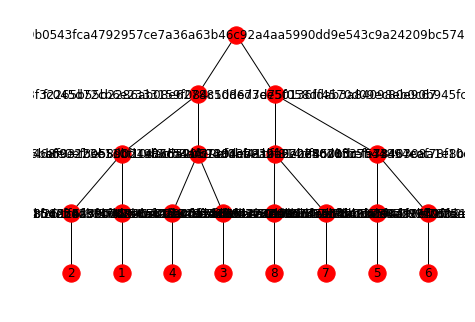

In [170]:
def main():
        # Create a directed graph
        G = nx.DiGraph()
        Edges=resul #[("h1234","h12"),("h1234","h34"),("h12","h1"),("h12","h2"),("h34","h3"),("h34","h4")]
       
        # Build up a graph
        for t in Edges:
            G.add_edge(t[0], t[1])
     
        # Plot trees
        pos=graphviz_layout(G, prog='dot')
        nx.draw(G, pos, with_labels=True, arrows=False)
     
        plt.savefig('draw_trees_with_pygraphviz.png', bbox_inches='tight')   
        plt.show()
main()

In [171]:
nx.draw?

In [123]:
p=5
h=2
g=3
q=3
#x=12
r=3

In [124]:
# This is the prover algorithm
def prover(q,g,h,x,r,d):
    if not Is_prime(q):
        print('{} n est pas premier!!!!'.format(q))
    else: 
        x=Convert_to_interger(x,q,d)
        C=pow(g,x)*pow(h,r)
        k=random.randint(1,q-1)
        t=random.randint(1,q-1)    
        #c=random.randint(1,q-1)
        c=verifier_challenge(p)    ## this is the challenge
        R=int(pow(g,k)*pow(h,t))
        print(k,t,c)
        z=k-c*x
        y=t-c*r
        pi,A=Return_Elt(d,x) ## d represent the Merkle tree
        elt=sha256(str(x)).hexdigest()
    return C,c,z,y,R,pi,A,elt

In [172]:
C,c,z,y,R,pi,A,elt=prover(3,3,2,5,3,d)
C,c,z,y,R,pi,A,elt

(1, 1, 3)


(1944.0,
 3,
 -14,
 -8,
 6,
 ['ef2d127de37b942baad06145e54b0c619a1f22327b2ebbcfbec78f5564afe39d',
  'e7f6c011776e8db7cd330b54174fd76f7d0216b612387a5ffcfb81e6f0919683',
  'a69e223e110f10dac552b6730debea2f814df450bdc7533467caf78f10df2a0c',
  '0a6d319ba3f32265b55b2286ab08e62788508ed3ee50136fdab3a84098eb0c67'],
 'a3f49b0543fca4792957ce7a36a63b46c92a4aa5990dd9e543c9a24209bc574a',
 'ef2d127de37b942baad06145e54b0c619a1f22327b2ebbcfbec78f5564afe39d')

In [173]:
# this is the verifier Algorithm
def verifier(C,c,z,y,R,pi,A,elt,g,h):
    r=int(pow(C,c)*pow(g,z)*pow(h,y))
    bol=Check_Membership(pi,elt,A)
    print(r,R)
    if (R==r and bol==True):
        
        return True
    return False

In [174]:
verifier(C,c,z,y,R,pi,A,elt,g,h)

(6, 6)


True

In [175]:
def __main__():
    
    p=51
    h=2
    g=3
    q=31
    x=5
    r=3
    Data= d
    C,c,z,y,R,pi,A,elt=prover(q,g,h,x,r,d)
    
    if verifier(C,c,z,y,R,pi,A,elt,g,h)==True:
        print("L element {} appartient a Data".format(elt))
    else:
        print("L element {} n'appartient a Data".format(elt))
__main__()

(21, 14, 2)
(171382426877952, 171382426877952)
L element ef2d127de37b942baad06145e54b0c619a1f22327b2ebbcfbec78f5564afe39d appartient a Data


# End of Demo